In [10]:
# seaborn 데이터 시각화 1
# matplotlib을 더 쉽게 사용할 수 있도록 만든 라이브러리
# pip install seaborn

In [9]:
# [관련 문서들 참고]
# matplot pyplot 공식 도큐먼트 살펴보기 : https://matplotlib.org/stable/gallery/index.html
# seaborn 공식 도큐먼트 살펴보기 : https://seaborn.pydata.org/examples/index.html
# seaborn 내장 데이터셋 : https://seaborn.pydata.org/generated/seaborn.load_dataset.html#
# seaborn 디지털 도서 : https://wikidocs.net/86290

In [11]:
# ready set
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image

# seaborn
import seaborn as sns

In [12]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [13]:
import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [14]:
# 0. Seaborn의 장점
# matplotlib으로 대부분의 시각화가 가능하나, seaborn을 사람들이 선호하는 이유

In [16]:
# 0-1. seaborn에서만 제공되는 통계 기반 plot
# https://github.com/mwaskom/seaborn-data/blob/master/tips.csv
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
# tips 데이터 정보
# total_bill: 총 합계 요금표
# tip: 팁
# sex: 성별
# smoker: 흡연자 여부
# day: 요일
# time: 식사 시간
# size: 식사 인원

In [19]:
# 컬럼 이름 변경하고 파일로 저장하기
tips = tips.rename(columns={"sex": "gender"})
import os
path = "datas"
if not os.path.exists(path):
    os.mkdir(path)
tips.to_csv(f"{path}/sns_tips.csv", index=False)

In [20]:
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


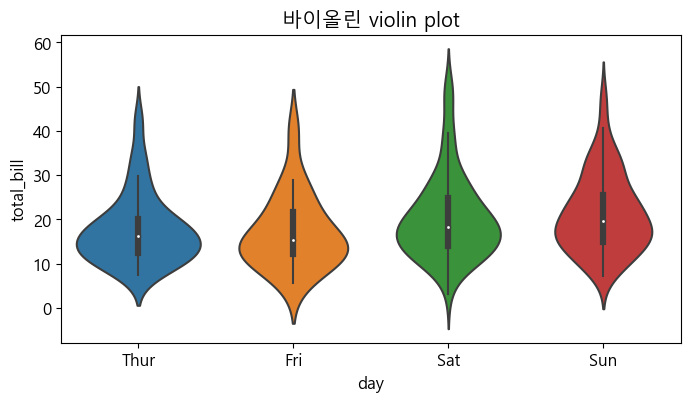

In [22]:
sns.violinplot(data=tips, x='day', y='total_bill')
plt.title('바이올린 violin plot')
plt.show()

In [24]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

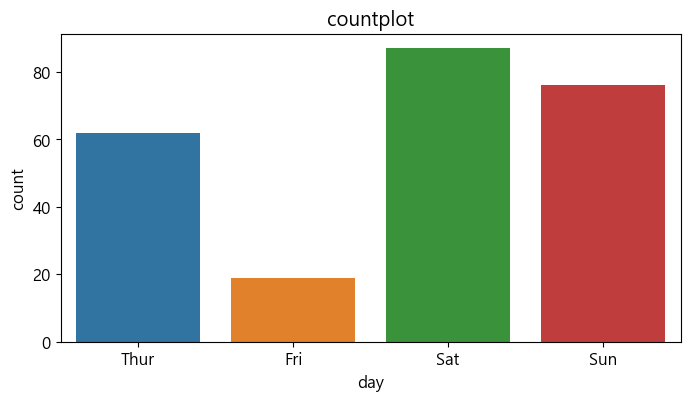

In [25]:
sns.countplot(x=tips['day'])
plt.title('countplot')
plt.show()

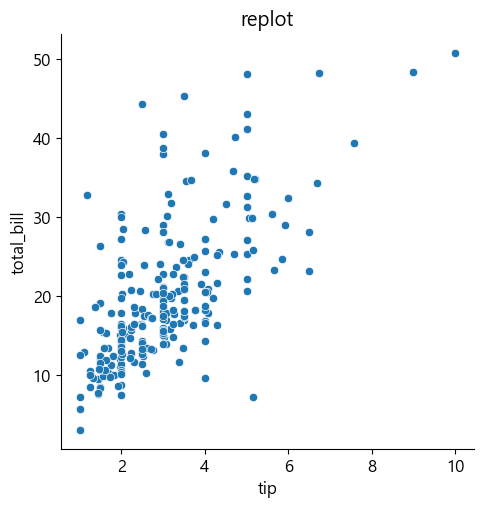

In [28]:
sns.relplot(data=tips, x='tip', y='total_bill')
plt.title('replot')
plt.show()

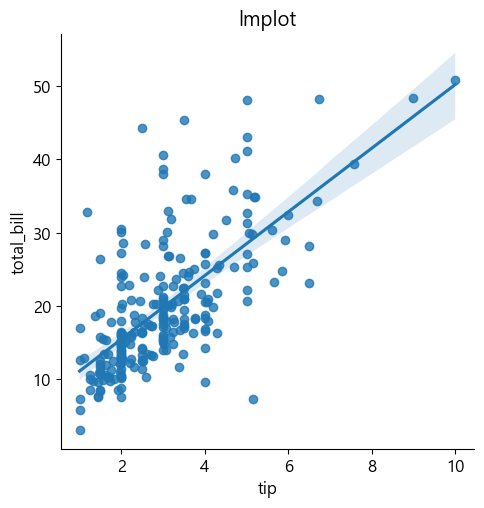

In [34]:
sns.lmplot(data=tips, x='tip', y='total_bill')
plt.title('lmplot')
plt.show()

In [30]:
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [31]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [32]:
# 0-2. 아름다운 스타일링
# seaborn의 최대 장점 중 하나인, 아름다운 컬러팔레트
# matplotlib의 기본 컬러 색상보다 seaborn은 스타일링에 크게 신경을 쓰지 않아도 default 컬러가 예쁘게 조합 됨

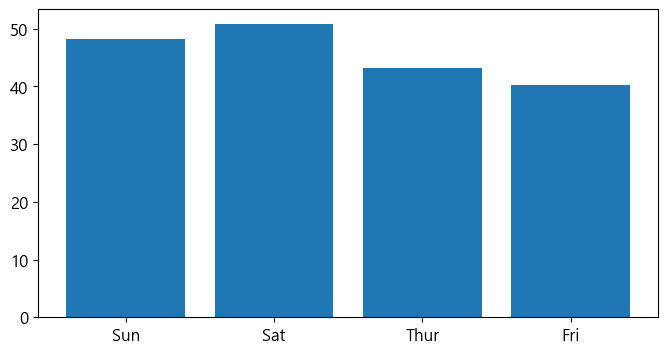

In [33]:
plt.bar(tips['day'], tips['total_bill'])
plt.show()

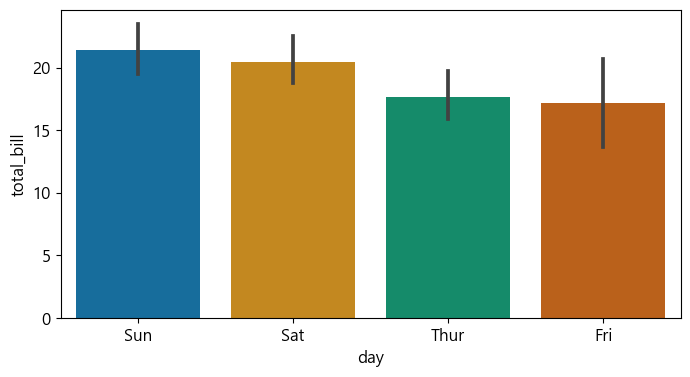

In [35]:
sns.barplot(data=tips, x='day', y='total_bill', palette='colorblind')
plt.show()

In [36]:
# 0-3. 컬러 팔레트
# 자세한 컬러팔레트는 공식 도큐먼트 참고 : https://seaborn.pydata.org/tutorial/color_palettes.html

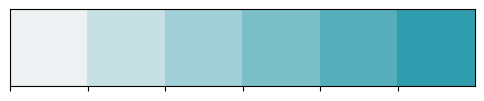

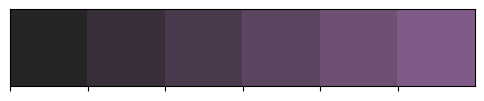

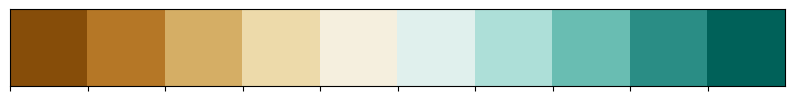

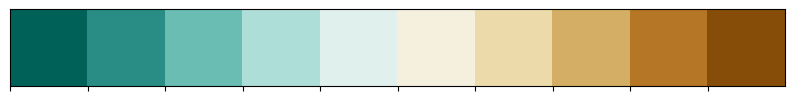

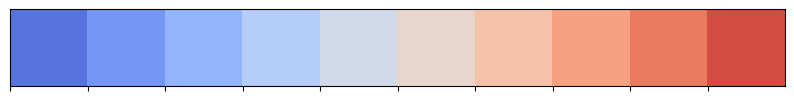

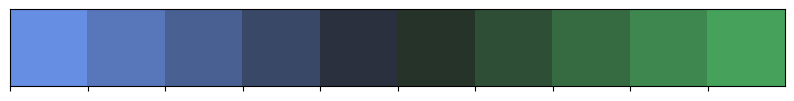

In [37]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("BrBG_r", 10))
sns.palplot(sns.color_palette("coolwarm", 10))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))

<Axes: xlabel='tip', ylabel='total_bill'>

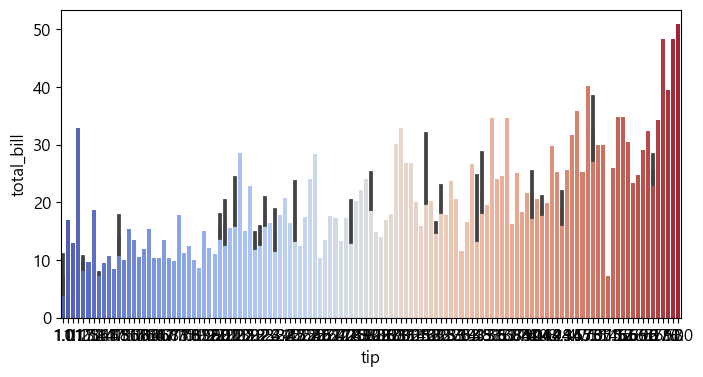

In [38]:
sns.barplot(data=tips, x='tip', y='total_bill', palette='coolwarm')

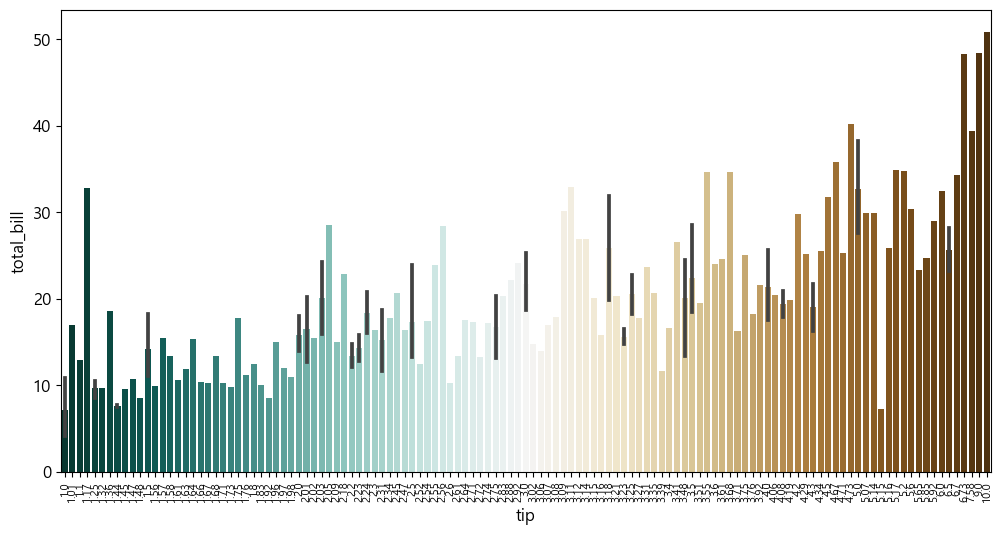

In [39]:
plt.figure(figsize=(12,6))

sns.barplot(data=tips, x='tip', y='total_bill', palette='BrBG_r')

# x축 tick 레이블 각도 변경
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [41]:
# 0-4. pandas 데이터프레임과 높은 호환성

In [42]:
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


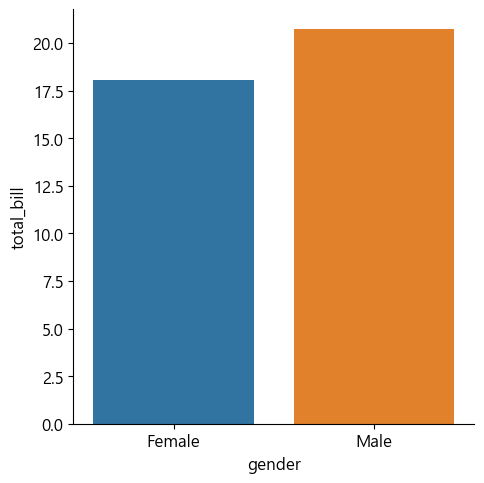

In [44]:
# 데이터 프레임 시각화
sns.catplot(data=tips, 
            x="gender", y="total_bill",
            kind="bar",
            ci=None)
plt.show()

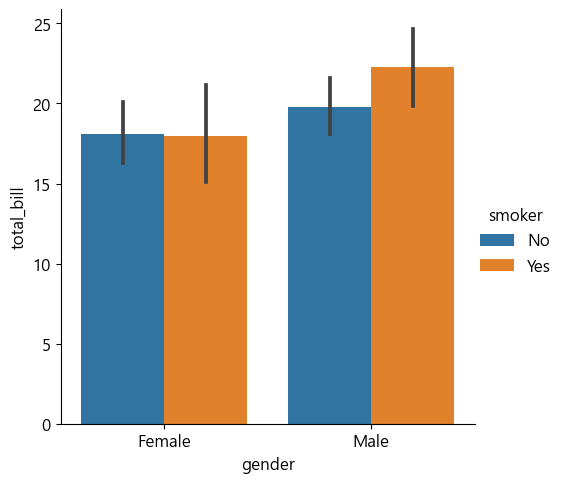

In [45]:
# hue 옵션으로 bar를 구분
# - xtick, ytick, xlabel, ylabel을 알아서 생성해 줌
# - legend 까지 자동으로 생성함
# - 신뢰 구간도 알아서 계산하여 생성
sns.catplot(data=tips,
            x="gender", y="total_bill",
            hue='smoker',
            kind='bar')
plt.show()

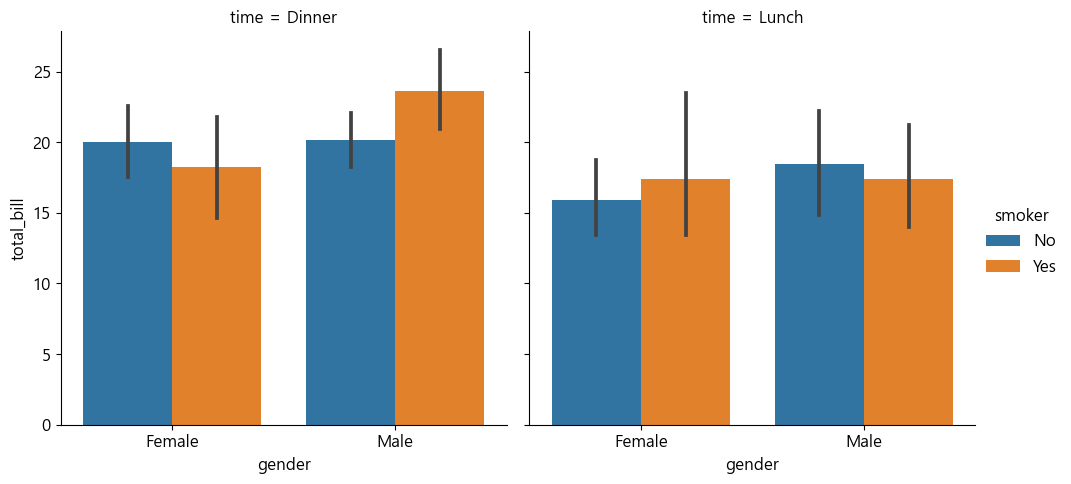

In [46]:
# col옵션 하나로 그래프 자체를 분할해 줌
sns.catplot(data=tips, 
            x="gender", y="total_bill",
            hue="smoker", 
            col="time",
            kind="bar")
plt.show()

In [47]:
# 상관관계 계수 heatmap 시각화
# heatmap으로 시각화할 대상 컬럼은 모두 숫자로 되어있어야함.
# 상관관계 계수를 적용하기 범주형 데이터를 숫자로 변경하기

In [107]:
# [문제] 범주형 데이터를 label로 인코딩하기
# 범주형 데이터 컬럼을 찾기
# 범주형 컬럽의 values 확인
# 범주형 values -> 숫자로 변환

# 데이터 준비
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
# 범주형 데이터인 'gender', 'smoker', 'day', 'time' 열에 레이블 인코딩 적용
# 범주형 데이터를 숫자로 바꾼다?
# 1. lable encoding
# # - ex)          의류, 가전,  식품, 장난감
# # - ex) label     0,     1,    2,    3
# # - ex) one-hot  0001, 0010, 0100, 1000
# 2. one-hot encoding
# # - 

In [ ]:
# 먼저 각 값을 알아야 함
# tips['gender'].value_counts()
# tips['smoker'].value_counts()
# tips['day'].value_counts()
# tips['time'].value_counts()

gender
Male      157
Female     87

smoker
No     151
Yes     93

day
Sat     87
Sun     76
Thur    62
Fri     19

time
Dinner    176
Lunch      68

In [108]:
# tips = pd.get_dummies(tips, columns=['gender', 'smoker', 'day', 'time'], dtype=int)
# tips
gender_map = {
    'Female': 0, 
    'Male' : 1
}
tips['gender'] = tips['gender'].map(gender_map)
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,No,Sat,Dinner,3
240,27.18,2.00,0,Yes,Sat,Dinner,2
241,22.67,2.00,1,Yes,Sat,Dinner,2
242,17.82,1.75,1,No,Sat,Dinner,2


In [109]:
smoker_map = {
    'No': 0, 
    'Yes' : 1
}
tips['smoker'] = tips['smoker'].map(smoker_map)
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,Dinner,3
240,27.18,2.00,0,1,Sat,Dinner,2
241,22.67,2.00,1,1,Sat,Dinner,2
242,17.82,1.75,1,0,Sat,Dinner,2


In [110]:
day_map = {
    'Sat': 0, 
    'Sun' : 1,
    'Thur' : 2,
    'Fri' : 3
}
tips['day'] = tips['day'].map(day_map)
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,0,0,1,Dinner,2
1,10.34,1.66,1,0,1,Dinner,3
2,21.01,3.50,1,0,1,Dinner,3
3,23.68,3.31,1,0,1,Dinner,2
4,24.59,3.61,0,0,1,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,0,Dinner,3
240,27.18,2.00,0,1,0,Dinner,2
241,22.67,2.00,1,1,0,Dinner,2
242,17.82,1.75,1,0,0,Dinner,2


In [111]:
time_map = {
    'Dinner': 0, 
    'Lunch' : 1
}
tips['time'] = tips['time'].map(time_map)
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,0,0,1,0,2
1,10.34,1.66,1,0,1,0,3
2,21.01,3.50,1,0,1,0,3
3,23.68,3.31,1,0,1,0,2
4,24.59,3.61,0,0,1,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,0,0,3
240,27.18,2.00,0,1,0,0,2
241,22.67,2.00,1,1,0,0,2
242,17.82,1.75,1,0,0,0,2


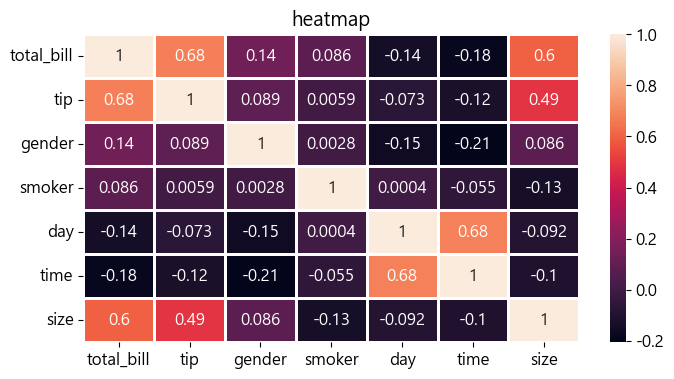

In [112]:
plt.title('heatmap')
sns.heatmap(tips.corr(), annot=True, linewidths=1)
plt.show()

In [ ]:
# 강사님 방식

# 원본 훼손 방지를 위해 copy
tips_cp = tips.copy()

# 우선 데이터 정보 확인
tips_cp.info()

# 범주형 데이터 확인
tips_cp.select_dtypes(include='object').columns

# 범주형 데이터 컬럼의 값 확인 : value_counts()
# 컬럼의 값 확인
tips_cp['gender'].value_counts().sort_index()

# mapping 값 정의
gen_map = ['Female' : 0,
           'Male' : 1]
tips_cp['gender'] = tips_cp['gender'].map(gen_map)
tips_cp['gender']

# 각 컬럼에 mapping 반복
# 패턴이므로 numpy함수 활용해 변수로 만들어서 for문 돌릴 수 있음
# scinum 쓸 수도 있음

# coloumns 확인
tips_cp.columns

# heatmap 실행

In [96]:
# data: 히트맵을 그릴 데이터셋, 2차원 배열 형태의 데이터를 입력받음
# annot: 히트맵 셀에 숫자 값을 표시할지 여부를 나타내는 부울값 또는 데이터 배열, 기본값은 False로 숫자 값이 표시되지 않음
# fmt: annot이 True로 설정된 경우 숫자 형식을 지정함, 예를 들어 ".2f"는 소수점 이하 2자리까지 표시하도록 지정함
# cmap: 히트맵의 색상 맵 지정, 예를 들어 "coolwarm", "viridis", "RdYlBu" 등 다양한 색상 맵을 사용할 수 있음
# # viridis: 영역별로 색상이 연속적으로 변화하는 색상 맵
# # plasma: 연속적인 분홍색과 청록색을 갖는 색상 맵
# # inferno: 연속적인 주황색과 검은색을 갖는 색상 맵
# # magma: 연속적인 검은색과 청록색을 갖는 색상 맵입
# # coolwarm: 차가운 색상과 따뜻한 색상이 교대로 나타나는 색상 맵
# # RdBu: 붉은색과 청록색이 교대로 나타나는 색상 맵
# # YlGnBu: 노란색, 녹색, 청록색, 파란색이 연속적으로 변화하는 색상 맵
# linewidths: 히트맵 셀 사이의 경계선 두께 지정
# linecolor: 히트맵 셀 사이의 경계선 색상을 지정
# cbar: 컬러바를 표시할지 여부를 나타내는 부울값임. 기본값은 True로 컬러바가 표시됨
# vmin, vmax : 컬러바의 범위 지정

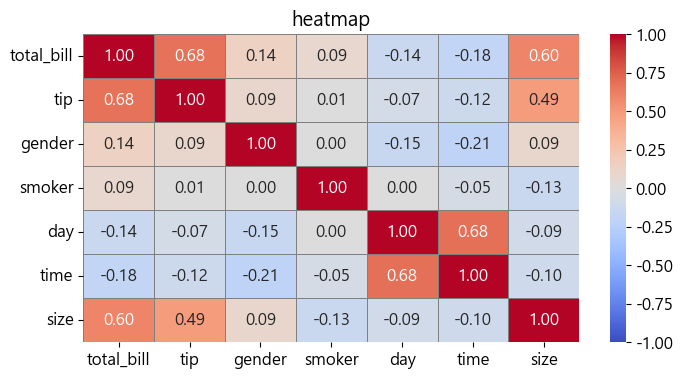

In [113]:
plt.title('heatmap')
sns.heatmap(tips.corr(), 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            linewidths=0.5, 
            linecolor="gray", 
            cbar=True,
            vmin=-1,
            vmax=1
           )
plt.show()